Plot the number of tweets per day from a specific account, by parsing Twitter Analytics CSV download.

Note: Twitter calls Analytics ["Tweet activity dashboard"](https://help.twitter.com/en/managing-your-account/using-the-tweet-activity-dashboard)

Richard Akerman
April 11, 2021

Code developed in [Google Colaboratory](https://colab.research.google.com/) will be posted to GitHub (scilib) with MIT License.

Will base some of the code on

* blog posts per day code - see scilib GitHub https://github.com/scilib/typepad_blog_posts_per_day
* Ontario COVID-19 new cases chart code - see scilib GitHub https://github.com/scilib/ontario_cv19_opendata_plot

# Downloading your Twitter Analytics stats

To download your stats, login to your Twitter account and go to More... Analytics, or directly to

https://analytics.twitter.com/

then select Tweets from the menu at the top.

The URL will be 

<pre>https://analytics.twitter.com/user/<var>twitter_username</var>/tweets</pre>

Set your date range by pulling down the "Last 28 Days" menu.

## For download

1.  **The limits for the dates it will let you export are listed in the pulldown menu.**  It lists the last 5 months inclusive.
2.   **The maximum permitted range for export, within the constraint above, is one month (31 days).** 

In other words, for each individual download you can only export a 31 day range within the last 5 months.

## For display

You can select and *display* ranges before the date listed in the pulldown menu, but if you try to *export* them it will give the rather misleading message "There was a problem exporting your data, try again later."

The maximum range it will let you select is three months, but if you do so, the Export data option will be disabled.<br/>
     If you try to select a range longer than three months it will just automatically adjust the start or end date to always constrain it to three months.

## To export the data, by date, as CSV

Select the pulldown menu Export data ⌄ and then select By day.

# Inspecting the CSV manually

In Mac Numbers it is easy to see it is a well-formatted file (and in fact you could just plot it in a spreadsheet).

Download filename format:

<pre>
daily_tweet_activity_metrics_<var>twitterusername</var>_<var>startdateYYYYMMDD</var>_<var>enddateYYYYMMDD</var>_en.csv
</pre>
e.g.
<pre>
daily_tweet_activity_metrics_<i>foo</i>_20210101_20210201_en.csv
</pre>

The key items for the purposes of this code are:

<pre>
Column 0 - Date  |  Column 1 - Tweets published
YYYY-MM-DD       |  numerical count including 0 on days with no tweets
</pre>

There are a lot of other columns with useful info but this code won't examine them.

# Mount the Google Drive

(This only needs to be done once per active session.
You will need to re-run it if your instance disconnects.)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Set up

In [27]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Access the file on the web and
# make a dataframe of dates and tweet counts from Twitter Analytics CSV file

In [28]:
# Twitter Analytics CSV file
# You can use the same pandas format to read either from a local file or from a web URL

# Remember that for Google Drive you have to include the full file path

twitter_analytics_data_file = "/content/gdrive/MyDrive/Colab Notebooks/daily_tweet_activity_metrics_EXAMPLE_20210101_20210201_en.csv"
df_twitter_analytics_data = pd.read_csv(twitter_analytics_data_file)

# Have a look at the data

In [29]:
# do sample and info to have a look at the data
#   - dates are "object",
#   - tweet counts are int64

df_twitter_analytics_data.info()
df_twitter_analytics_data[['Date','Tweets published']].sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          31 non-null     object 
 1   Tweets published              31 non-null     int64  
 2   impressions                   31 non-null     int64  
 3   engagements                   31 non-null     int64  
 4   engagement rate               31 non-null     float64
 5   retweets                      31 non-null     int64  
 6   replies                       31 non-null     int64  
 7   likes                         31 non-null     int64  
 8   user profile clicks           31 non-null     int64  
 9   url clicks                    31 non-null     int64  
 10  hashtag clicks                31 non-null     int64  
 11  detail expands                31 non-null     int64  
 12  permalink clicks              31 non-null     int64  
 13  app ope

,Date,Tweets published
19,2021-01-20,0
17,2021-01-18,0
30,2021-01-31,0
10,2021-01-11,0
14,2021-01-15,2


# Make the chart

Should be able to plot directly, unless I need to do something about the dates.

Need to do some minor formatting for the chart.

StackOverflow - [Changing the “tick frequency” on x or y axis in matplotlib?](https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib)

Learn Python - [String Formatting](https://www.learnpython.org/en/String_Formatting)

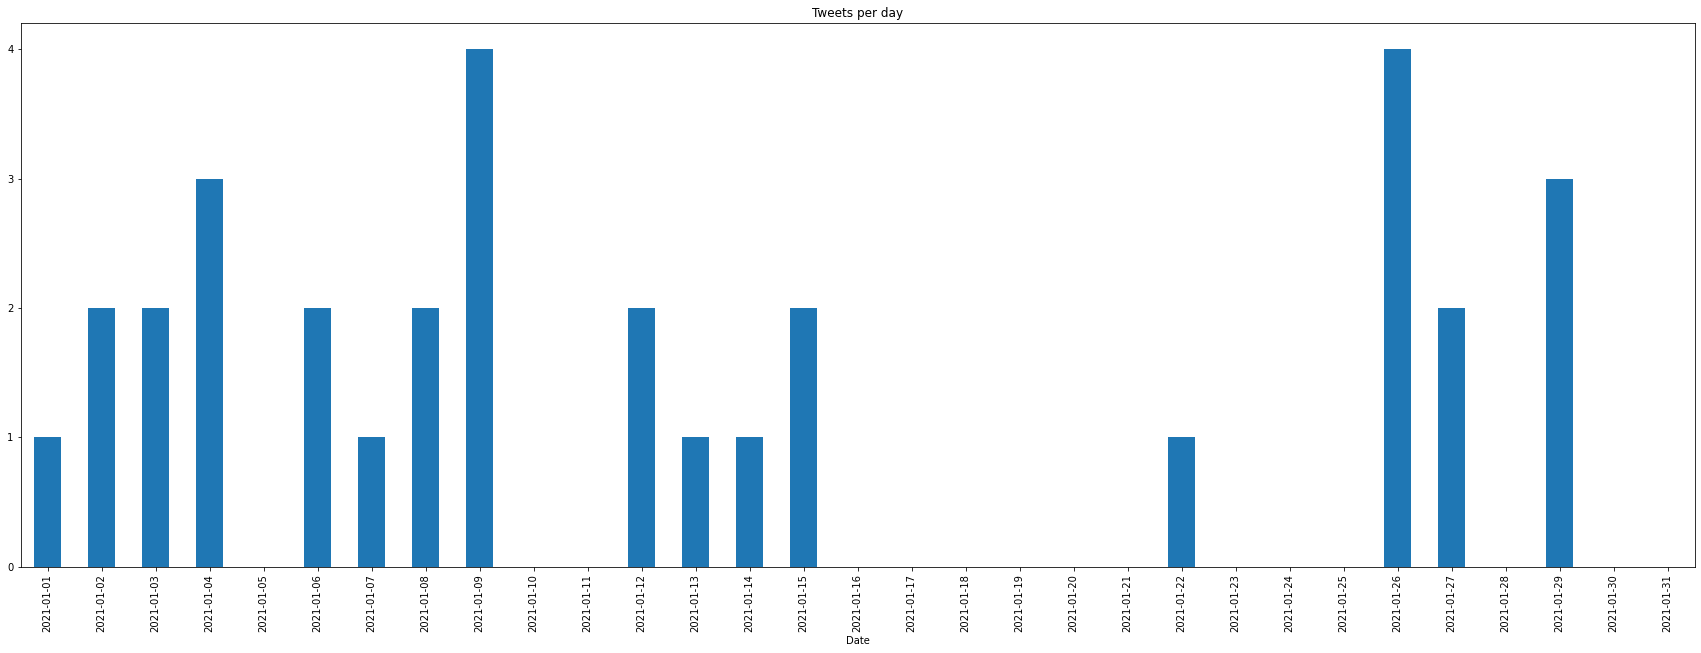

In [32]:
# not surprisingly it looks like xaxis and yaxis are reserved so best not to overload

tweets_xaxis = 'Date' 
tweets_yaxis = 'Tweets published'

tweets_title = "Tweets per day"

stepsize_yaxis = 1

# with the size chosen, the y axis font default is so small that 4.0 looks like 40
# so change the yaxis display
# tried formatting with %d for integers
# but if you do that it just strips the floating point rather than actually changing
#   the ticks, so you get 3 for 3.0 but also 3 for 3.5, which is not good

# assign the yaxis set_ticks output to _ to discard it

ax = df_twitter_analytics_data.plot.bar(x=tweets_xaxis,y=tweets_yaxis,figsize=(30,10),legend=False,title=tweets_title)
start_yaxis, end_yaxis = ax.get_ylim()
_ = ax.yaxis.set_ticks(np.arange(start_yaxis, end_yaxis, stepsize_yaxis))

# with this stepsize I don't need to change the formatting to %d decimal since it is integer steps
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))